# 📊 Predicción de Churn en Telecom

Este notebook desarrolla el flujo de trabajo del proyecto final de **Metodología para Data Science**.

Dataset: [Telco Customer Churn (IBM)](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


In [1]:
# Instalación de librerías (si es necesario)
# !pip install pandas numpy scikit-learn xgboost matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
# Cargar dataset (ajusta la ruta a donde guardes el archivo)
df = pd.read_csv('../data/Telco-Customer-Churn-dirty.csv')

print("Dimensiones:", df.shape)
df.head()

Dimensiones: (7053, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [3]:
# Preprocesamiento básico

# Eliminar filas con valores vacíos en TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)

# Separar variables predictoras y objetivo
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Escalado de variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Conjunto de entrenamiento:", X_train.shape, "Conjunto de prueba:", X_test.shape)

Conjunto de entrenamiento: (5352, 1590) Conjunto de prueba: (1338, 1590)


In [4]:
# Entrenamiento de modelos

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


c:\Users\Daniel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:42:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Modelo: Logistic Regression
Accuracy: 0.7309417040358744
Recall: 0.5210084033613446
ROC-AUC: 0.6641739264513145

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.82      0.81      0.81       981
        True       0.50      0.52      0.51       357

    accuracy                           0.73      1338
   macro avg       0.66      0.66      0.66      1338
weighted avg       0.74      0.73      0.73      1338



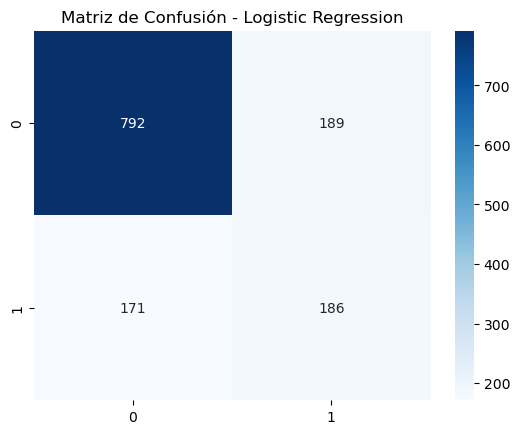


Modelo: Random Forest
Accuracy: 0.7907324364723468
Recall: 0.45938375350140054
ROC-AUC: 0.6853493691054404

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.82      0.91      0.86       981
        True       0.65      0.46      0.54       357

    accuracy                           0.79      1338
   macro avg       0.74      0.69      0.70      1338
weighted avg       0.78      0.79      0.78      1338



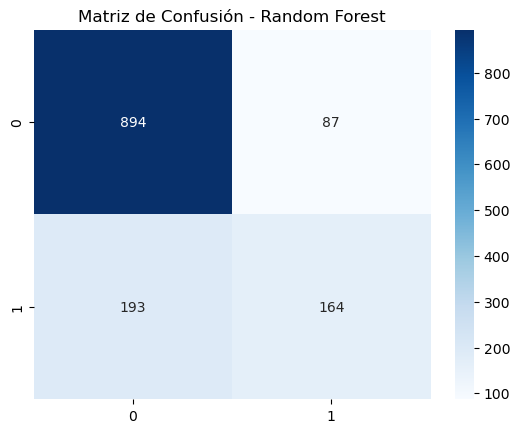


Modelo: XGBoost
Accuracy: 0.7832585949177877
Recall: 0.5182072829131653
ROC-AUC: 0.6989609299377243

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.83      0.88      0.86       981
        True       0.61      0.52      0.56       357

    accuracy                           0.78      1338
   macro avg       0.72      0.70      0.71      1338
weighted avg       0.77      0.78      0.78      1338



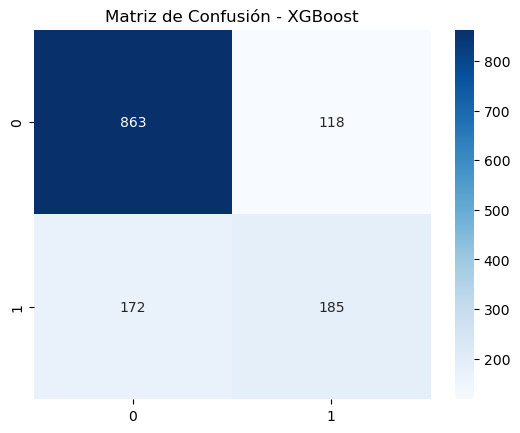

In [5]:
# Función de evaluación
def evaluar_modelo(y_test, y_pred, nombre):
    print(f"\nModelo: {nombre}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()

# Evaluar los tres modelos
evaluar_modelo(y_test, y_pred_lr, "Logistic Regression")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")
evaluar_modelo(y_test, y_pred_xgb, "XGBoost")

## ✅ Conclusiones iniciales

- Se entrenaron tres modelos: Logistic Regression, Random Forest y XGBoost.
- Las métricas clave fueron **Accuracy**, **Recall** (para churn) y **ROC-AUC**.
- El siguiente paso será comparar los resultados y definir el modelo con mejor desempeño.
